In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.utils import class_weight, shuffle

Using TensorFlow backend.


In [3]:
os.listdir('C:/Users/Rajshah/animals10/raw-img')
foldernames = os.listdir('C:/Users/Rajshah/animals10/raw-img')
categories = []
files = []
i = 0
labels = []
for folder in foldernames:
    filenames = os.listdir("C:/Users/Rajshah/animals10/raw-img/" + folder);
    for file in filenames:
        files.append("C:/Users/Rajshah/animals10/raw-img/" + folder + "/" + file)
        categories.append(i)
    i = i + 1
    labels.append(folder)
        
        
df = pd.DataFrame({
    'filename': files,
    'category': categories
})

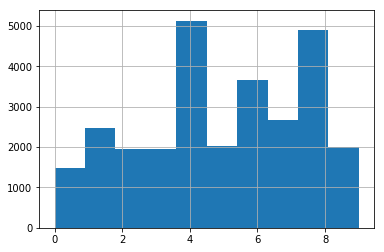

In [4]:
x = df['filename']
y = df['category']

x, y = shuffle(x, y, random_state=8)
y.hist()

In [5]:
import cv2
sift = cv2.ORB_create()
def fd_sift(image) :
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kps, des = sift.detectAndCompute(image, None)
    return des if des is not None else np.array([]).reshape(0, 128)

In [6]:
global_features = []
labels          = y
fixed_size = (500,500)
for file in x[:2000]:
    image = cv2.imread(file)
    image.resize((500,500,3))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    global_feature = np.hstack([image])
    global_feature.resize(fixed_size)
    global_features.append(global_feature)

In [7]:
for i in global_features[:10]:
    print(i.shape)

(500, 500)
(500, 500)
(500, 500)
(500, 500)
(500, 500)
(500, 500)
(500, 500)
(500, 500)
(500, 500)
(500, 500)


In [8]:
X_train = np.array(global_features)
X_train = X_train.reshape(len(X_train),500*500)
Y_train = np.array(y[0:2000])
len(X_train),X_train.shape

(2000, (2000, 250000))

In [9]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(X_train, Y_train, 
                                                      test_size=0.3, 
                                                      stratify=Y_train, 
                                                      random_state=8)
print(train_x.shape)
print(train_y.shape)
print(valid_x.shape)
print(valid_y.shape)

(1400, 250000)
(1400,)
(600, 250000)
(600,)


In [10]:
(X_train, y_train), (X_test, y_test) = (train_x, train_y), (valid_x, valid_y)
test_x,X_val, test_y, y_val = train_test_split(X_test, y_test, 
                                                      test_size=0.5, 
                                                      stratify=y_test, 
                                                      random_state=8)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1400, 250000) (1400,) (600, 250000) (600,)


In [11]:
X_train = X_train.reshape(X_train.shape[0], 500, 500,1)
X_val = X_val.reshape(X_val.shape[0], 500, 500,1)
X_test = X_test.reshape(X_test.shape[0], 500, 500,1)
print(X_train.shape,X_val.shape,X_test.shape)

(1400, 500, 500, 1) (300, 500, 500, 1) (600, 500, 500, 1)


In [12]:
Y_train = np_utils.to_categorical(y_train,10)
Y_val = np_utils.to_categorical(y_val,10)
Y_test = np_utils.to_categorical(y_test,10)
print(Y_train.shape,Y_val.shape,Y_test.shape)

(1400, 10) (300, 10) (600, 10)


In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(500,500,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

Train on 1400 samples, validate on 300 samples
Epoch 1/10
1400/1400 [==============================] - 14s 10ms/step - loss: 2.4696 - accuracy: 0.1407 - val_loss: 2.2553 - val_accuracy: 0.1967
Epoch 2/10
1400/1400 [==============================] - 11s 8ms/step - loss: 2.2212 - accuracy: 0.1957 - val_loss: 2.1948 - val_accuracy: 0.1967
Epoch 3/10
1400/1400 [==============================] - 11s 8ms/step - loss: 2.1998 - accuracy: 0.1879 - val_loss: 2.1935 - val_accuracy: 0.1967
Epoch 4/10
1400/1400 [==============================] - 11s 8ms/step - loss: 2.2017 - accuracy: 0.1779 - val_loss: 2.1937 - val_accuracy: 0.1967
Epoch 5/10
1400/1400 [==============================] - 11s 8ms/step - loss: 2.2004 - accuracy: 0.1757 - val_loss: 2.1929 - val_accuracy: 0.1967
Epoch 6/10
1400/1400 [==============================] - 11s 8ms/step - loss: 2.2007 - accuracy: 0.1836 - val_loss: 2.1925 - val_accuracy: 0.1967
Epoch 7/10
1400/1400 [==============================] - 11s 8ms/step - loss: 2.201

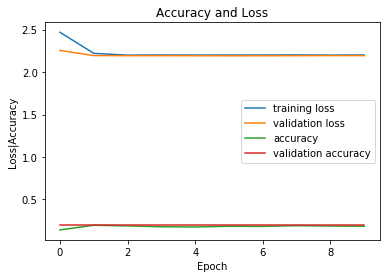

In [16]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
model.save('animal_classification.h5')

In [ ]:
load_model = tf.keras.models.load_model('animal_classification.h5')

In [ ]:
image_path = 'C:\Users\Rajshah\animals10\raw-img\cavallo\OIP-_4xQfMZofBLJHN-EjvNIbAHaFa.jpeg'
img = image.load_img(image_path, target_size=(500,500))
plt.imshow(img)
result = load_model.predict(np.array(img))

In [ ]:
result

In [ ]:
number_to_class = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo'] 
index = np.argsort(result[0,:])